In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

import xgboost as xgb
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv('train.csv')
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [3]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [4]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


<AxesSubplot:title={'center':'Customer Response'}>

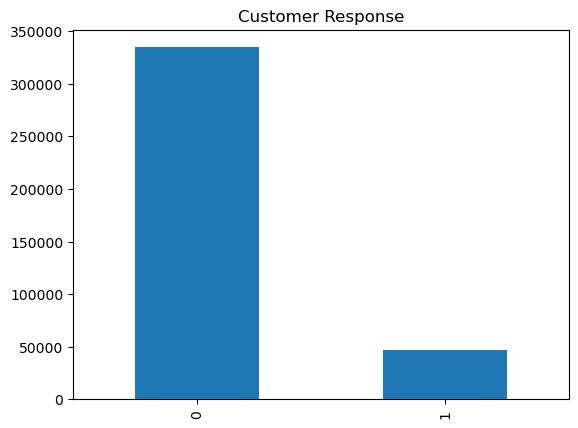

In [5]:
df.Response.value_counts().plot(kind='bar', title='Customer Response')

# Data cleaning
1. No NUll value
2. Will drop column ID
3. Need to transform to one-hot: 'Gender','Region_Code','Vehicle_Age','Vehicle_Damage','Policy_Sales_Channel'
4. Need MinMaxScale: Age, Annual_Premium, Vintage
5. Need discover Corr

In [6]:
df = df.drop(columns=['id'])

In [8]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [13]:
df['Policy_Sales_Channel'].value_counts()

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
149.0         1
43.0          1
144.0         1
143.0         1
41.0          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64

In [14]:
df = pd.get_dummies(df, columns=['Gender','Region_Code','Vehicle_Age','Vehicle_Damage','Policy_Sales_Channel'], drop_first=True)

In [15]:
# Transform numeric data to range 0:1
scaler = MinMaxScaler()
df[['Age','Annual_Premium','Vintage']] = scaler.fit_transform(df[['Age','Annual_Premium','Vintage']])

In [16]:
df

,Age,Driving_License,Previously_Insured,Annual_Premium,Vintage,Response,Gender_Male,Region_Code_1.0,Region_Code_2.0,Region_Code_3.0,...,Policy_Sales_Channel_152.0,Policy_Sales_Channel_153.0,Policy_Sales_Channel_154.0,Policy_Sales_Channel_155.0,Policy_Sales_Channel_156.0,Policy_Sales_Channel_157.0,Policy_Sales_Channel_158.0,Policy_Sales_Channel_159.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_163.0
0,0.369231,1,0,0.070366,0.716263,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.861538,1,0,0.057496,0.598616,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.415385,1,0,0.066347,0.058824,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.015385,1,1,0.048348,0.667820,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.138462,1,1,0.046259,0.100346,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,0.830769,1,1,0.051234,0.269896,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
381105,0.153846,1,1,0.069551,0.418685,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
381106,0.015385,1,1,0.060439,0.522491,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
381107,0.738462,1,0,0.078110,0.221453,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
x = df.drop(columns=['Response'])
y = df['Response']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42, stratify=y)


# Train with Logistic Regression

C:\Users\vy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66880
           1       0.37      0.00      0.01      9342

    accuracy                           0.88     76222
   macro avg       0.62      0.50      0.47     76222
weighted avg       0.82      0.88      0.82     76222



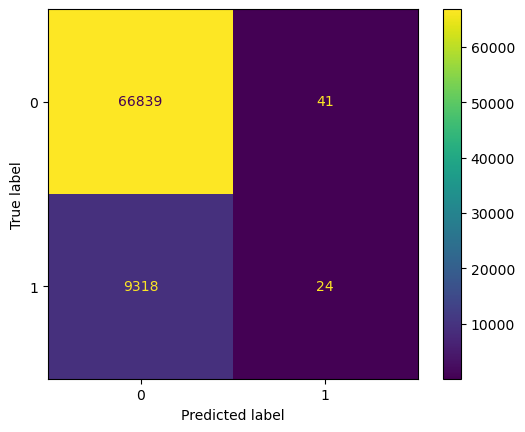

In [22]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(x_train, y_train)
y_pred = model_log.predict(x_test)

print(classification_report( y_test, y_pred))
plot_confusion_matrix(model_log, x_test, y_test)

# Train with XGBoost

In [30]:
x_train = x_train.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Less_1Year", "Vehicle_Age_> 2 Years": "Vehicle_More_2Year" }, errors="raise")
x_test = x_test.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Less_1Year", "Vehicle_Age_> 2 Years": "Vehicle_More_2Year" }, errors="raise")

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66880
           1       0.46      0.02      0.04      9342

    accuracy                           0.88     76222
   macro avg       0.67      0.51      0.48     76222
weighted avg       0.83      0.88      0.82     76222



C:\Users\vy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


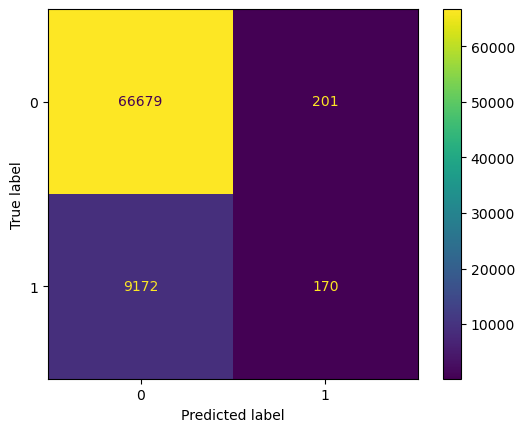

In [31]:
model_xgb = xgb.XGBClassifier(random_state=42, n_estimators=100)
model_xgb.fit(x_train, y_train)


y_pred = model_xgb.predict(x_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(model_xgb, x_test, y_test)

# Another XGBoost with param

In [32]:
model_xgb_2 =  xgb.XGBClassifier(objective='binary:logistic',seed = 42, early_stopping_rounds=10)
model_xgb_2.fit (x_train, y_train,
              verbose = True,
              eval_metric = 'aucpr',
              eval_set = [(x_test, y_test)])

C:\Users\vy\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-aucpr:0.33075
[1]	validation_0-aucpr:0.34714
[2]	validation_0-aucpr:0.35281
[3]	validation_0-aucpr:0.35154
[4]	validation_0-aucpr:0.35131
[5]	validation_0-aucpr:0.35155
[6]	validation_0-aucpr:0.35162
[7]	validation_0-aucpr:0.35470
[8]	validation_0-aucpr:0.35528
[9]	validation_0-aucpr:0.35709
[10]	validation_0-aucpr:0.35757
[11]	validation_0-aucpr:0.35990
[12]	validation_0-aucpr:0.36114
[13]	validation_0-aucpr:0.36203
[14]	validation_0-aucpr:0.36252
[15]	validation_0-aucpr:0.36325
[16]	validation_0-aucpr:0.36377
[17]	validation_0-aucpr:0.36343
[18]	validation_0-aucpr:0.36298
[19]	validation_0-aucpr:0.36287
[20]	validation_0-aucpr:0.36272
[21]	validation_0-aucpr:0.36407
[22]	validation_0-aucpr:0.36388
[23]	validation_0-aucpr:0.36376
[24]	validation_0-aucpr:0.36385
[25]	validation_0-aucpr:0.36390
[26]	validation_0-aucpr:0.36386
[27]	validation_0-aucpr:0.36494
[28]	validation_0-aucpr:0.36493
[29]	validation_0-aucpr:0.36451
[30]	validation_0-aucpr:0.36425
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

C:\Users\vy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


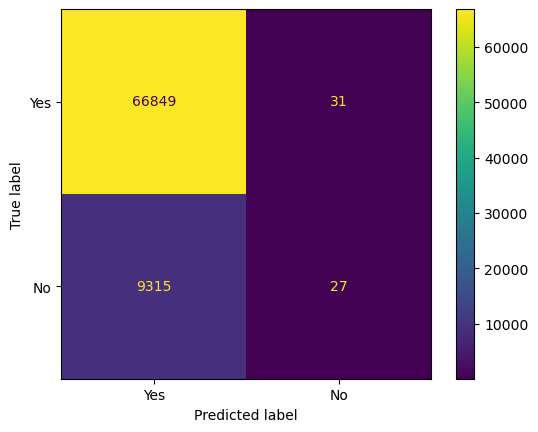

In [33]:
plot_confusion_matrix(model_xgb_2, x_test, y_test, values_format='d', display_labels=['Yes','No'])

Model got worse, and result was too terrible.
Let's try different way to define features for this model